In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

In [7]:
# vectorize the text i.e. convert the strings to numeric features

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [10]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
# print top terms per cluster clusters

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print "Cluster %d:" % i,
    for ind in order_centroids[i, :10]:
        print ' %s' % terms[ind],
    print

Top terms per cluster:
Cluster 0:  time  response  user  opinion  measurement  relation  perceived  error  computer  survey
Cluster 1:  graph  trees  minors  survey  paths  intersection  unordered  binary  generation  random
Cluster 2:  eps  interface  human  management  testing  engineering  user  machine  lab  abc


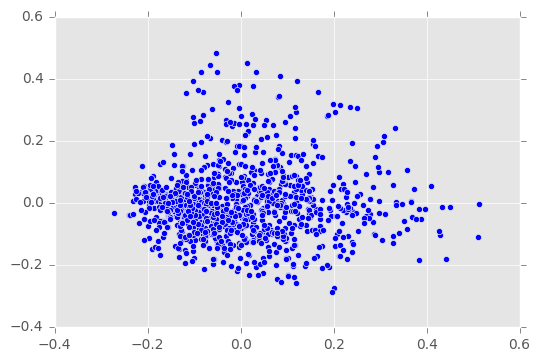

In [14]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

newsgroups_train = fetch_20newsgroups(subset='train', 
                                      categories=['alt.atheism', 'sci.space'])
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(newsgroups_train.data).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1])
plt.show()        

[9 6 9 6 9 9 3 5 3 6 8 8 0 4 6 4 3 0 7 4 6 5 3 0 3 9 4 5 2 3 3 4 6 9 0 1 3
 3 0 6 3 0 0 9 5 9 6 7 0 3 5 8 3 3 3 2 9 3 3 6 6 6 6 7 4 4 0 9 6 3 9 5 3 3
 0 1 8 5 6 6 2 2 5 6 3 6 2 3 6 9 4 2 3 3 0 0 8 3 0 5 0 1 6 8 3 5 0 3 0 0 0
 6 9 9 9 9 2 0 9 0 3 3 9 5 1 3 0 9 3 8 8 5 5 1 5 1 0 6 0 5 5 9 6 6 9 1 6 4
 7 6 6 8 0 0 2 0 6 9 6 0 0 9 0 3 0 2 0 0 0 6 0 3 0 0 7 4 9 0 0 3 0 9 8 0 3
 0 0 6 1 3 9 5 8 5 5 5 3 3 5 7 5 1 5 6 6 0 5 5 5 1 5 1 5 0 3 5 1 6 5 0 0 4
 6 1 0 8 9 0 7 3 6 0 6 0 0 6 0 6 6 6 3 3 8 5 0 6 0 0 6 3 7 5 6 3 5 6 3 3 8
 8 3 5 1 1 0 3 9 7 0 8 6 8 3 3 4 7 7 6 5 7 6 8 0 1 0 5 0 3 3 6 7 0 9 3 8 6
 6 8 3 8 7 5 7 6 7 3 2 0 0 3 2 0 0 4 0 0 0 0 3 4 0 0 0 3 0 4 4 3 0 0 3 7 3
 0 7 2 0 4 3 4 0 0 0 0 6 3 0 0 0 4 3 4 8 0 3 5 7 0 0 3 7 5 0 2 7 7 6 0 3 0
 3 7 4 8 0 3 3 3 1 2 7 0 0 0 3 7 0 0 9 0 0 3 0 6 3 5 0 2 9 1 8 0 0 0 0 3 3
 3 6 0 0 1 4 0 8 8 0 7 5 6 0 4 0]


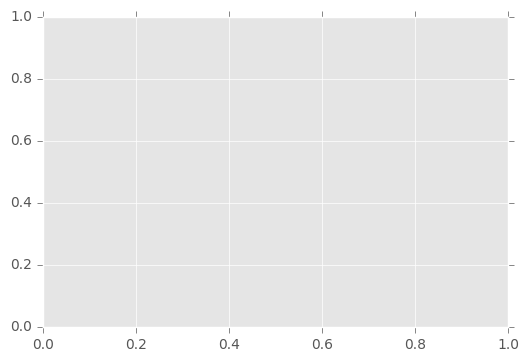

In [33]:
import numpy as np
from database import Database

database = Database(
    'localhost',
    '26feb',
    'root',
    'root',
    'utf8mb4'
)
connection = database.connect_with_pymysql()

if connection:
    with connection.cursor() as cursor:
        sql = "select answer from robi_answers where language=0"
        cursor.execute(sql)
        qs = cursor.fetchall()
    connection.close()

sentence_list=[]
for i in qs:
    sentence_list.append(i['answer'])
    
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentence_list)

km = KMeans(n_clusters=10, init='k-means++',n_init=10, verbose=0) 
#with 5 cluster, i want 5 different colors
km.fit(X)
# km.labels_ # [0,1,2,3,3,4,4,5,2,5]

pipeline = Pipeline([('tfidf', TfidfVectorizer())])
X = pipeline.fit_transform(sentence_list).todense()
pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
# LABEL_COLOR_MAP = {0 : 'r', 1 : 'k'}
# label_color = [LABEL_COLOR_MAP[l] for l in km.labels_]

# plt.scatter(data2D[:,0], data2D[:,1], c=label_color)


km.fit(X)
centers2D = pca.transform(km.cluster_centers_)
plt.hold(True)
labels=np.array(km.labels_)
print labels
connection = database.connect_with_pymysql()
id = 1
for i in labels:
    with connection.cursor() as cursor:
        insert_sql = "update robi_answers set group='"+str(labels)+"' where id="+str(id)+""
        cursor.execute(insert_sql)
        connection.commit()
connection.close()



In [6]:
from database import Database
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
database = Database(
    'localhost',
    '26feb',
    'root',
    'root',
    'utf8mb4'
)
connection = database.connect_with_pymysql()

if connection:
    with connection.cursor() as cursor:
        sql = "select * from robi_answers where language=0"
        cursor.execute(sql)
        qs = cursor.fetchall()
    connection.close()
sentence_list=[]
for i in qs:
    sentence_list.append(i['answer'])
    
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentence_list)
true_k = 20
km = KMeans(n_clusters=true_k, init='k-means++',n_init=1, max_iter=100) 
km.fit(X)
labels=np.array(km.labels_)
connection = database.connect_with_pymysql()

with connection.cursor() as cursor:
    id = 0
    for i in qs:
        cursor.execute("insert into robi_ans_bn(answer,cluster) values('"+i['answer']+"','"+str(labels[id])+"')")
        connection.commit()
        id+=1
connection.close()
# print("Top terms per cluster:")
# order_centroids = km.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print "Cluster %d:" % i,
#     for ind in order_centroids[i, :10]:
#         print ' %s' % terms[ind],
#     print

In [7]:
from database import Database

database = Database(
    'localhost',
    '26feb',
    'root',
    'root',
    'utf8mb4'
)
connection = database.connect_with_pymysql()

if connection:
    with connection.cursor() as cursor:
        try:
            sql = "select * from robi_ans_bn"
            cursor.execute(sql)
            qs = cursor.fetchall()
            for i in qs:
                cursor.execute("select id,body from questions where questions.id in (select question_id from answers where body='"+i['answer']+"')")
                get_questions = cursor.fetchall()
                for j in get_questions:
                    cursor.execute("insert into robi_qa_bangla(cluster_id, question_id, question) values('"+str(i['cluster'])+"','"+str(j['id'])+"','"+j['body']+"')")
                    connection.commit()
        finally:
            connection.close()
                

In [14]:
from database import Database

database = Database(
    'localhost',
    '26feb',
    'root',
    'root',
    'utf8mb4'
)
connection = database.connect_with_pymysql()

if connection:
    with connection.cursor() as cursor:
        try:
            sql = "SELECT questions.id as id, questions.source as source, questions.body as body from questions inner join questions_tags where questions.id = questions_tags.question_id and tag_id not in (21, 28, 32, 80, 88, 89)"
            cursor.execute(sql)
            qs = cursor.fetchall()
            for i in qs:
                cursor.execute("insert into ques_beauty_care(question_id, body, source, tag) values('"+str(i['id'])+"','"+i['body']+"','"+i['source']+"','others')")
                connection.commit()
        finally:
            connection.close()
                